In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import glob
pd.set_option('display.float_format', lambda x: '%s' % x)

In [3]:
path = r"E:\python\Pro1\untitled\MLStudy\aisai\data"  # file directory
all_files = glob.glob(path + "/*.csv")
li = []
header=["SUB_NO","CALL_MONTH","CALL_DURATION","CALL_MAX_DURATION","CALL_MIN_DURATION","CALL_STD_DURATION","CALL_TIMES","CALL_NUMS",
        "CALLING_DURATION","CALLING_MAX_DURATION","CALLING_MIN_DURATION","CALLING_STD_DURATION","CALLING_TIMES","CALLING_NUMS",
        "CALLED_DURATION","CALLED_MAX_DURATION","CALLED_MIN_DURATION","CALLED_STD_DURATION","CALLED_TIMES","CALLED_NUMS","SHORT_TIMES",
        "FIXED_TIMES","ADJACENT_MAX_PERIOD","ADJACENT_MIN_PERIOD","ADJACENT_STD_PERIOD","CALL_IN_00_07_TIMES","CALL_IN_07_13_TIMES",
        "CALL_IN_13_19_TIMES","CALL_IN_19_24_TIMES","WORKING_DAY_TIMES","WEEKEND_TIMES","INTERNATIONAL_TIMES","CALLING_STATION_NUMS",
        "FLOW_USAGE","SEND_MSG_NUMS","RECEIVE_MSG_NUMS","CALL_CHARGE","FLOW_CHARGE","MESSAGE_CHARGE","FLAG","STATUS","CUST_ID",
        "RECHARGE_TIMES","MAX_RECHARGE_AMOUNT","MIN_RECHARGE_AMOUNT","TOTAL_RECHARGE_AMOUNT","BATCH_ID","SUB_ID"]

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename,header=None,names=header, dtype={'SUB_NO':'str','CALL_MONTH':'str'})
    df["SUB_NO"]=df["SUB_NO"].astype("str")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

E:\python\Pro1\untitled\MLStudy\aisai\data\1.csv
E:\python\Pro1\untitled\MLStudy\aisai\data\2.csv
E:\python\Pro1\untitled\MLStudy\aisai\data\3.csv
E:\python\Pro1\untitled\MLStudy\aisai\data\4.csv
E:\python\Pro1\untitled\MLStudy\aisai\data\5.csv
E:\python\Pro1\untitled\MLStudy\aisai\data\6.csv


In [105]:
min(frame["SUB_NO"])

'111330537'

In [3]:
frame.count()

SUB_NO                   1979209
CALL_MONTH               1979209
CALL_DURATION            1872955
CALL_MAX_DURATION        1872955
CALL_MIN_DURATION        1872955
CALL_STD_DURATION              0
CALL_TIMES               1872956
CALL_NUMS                1872956
CALLING_DURATION          153492
CALLING_MAX_DURATION      153492
CALLING_MIN_DURATION      153492
CALLING_STD_DURATION           0
CALLING_TIMES             153492
CALLING_NUMS              153492
CALLED_DURATION          1734089
CALLED_MAX_DURATION      1734089
CALLED_MIN_DURATION      1734089
CALLED_STD_DURATION            0
CALLED_TIMES             1734089
CALLED_NUMS              1734089
SHORT_TIMES                30627
FIXED_TIMES                 3760
ADJACENT_MAX_PERIOD            0
ADJACENT_MIN_PERIOD            0
ADJACENT_STD_PERIOD            0
CALL_IN_00_07_TIMES       743683
CALL_IN_07_13_TIMES      1049300
CALL_IN_13_19_TIMES       870007
CALL_IN_19_24_TIMES        52963
WORKING_DAY_TIMES        1458262
WEEKEND_TI

In [4]:
df=frame.fillna(0)

In [107]:
df["CALL_MONTH"].count()

1979209

In [108]:
Counter(df["CALL_MONTH"])

Counter({'202010': 1840935, '202009': 138274})

In [109]:
Counter(df["FLAG"])

Counter({1.0: 1819687, 0.0: 159522})

In [9]:
 df.pivot_table(values='SUB_NO', index='STATUS', columns='FLAG', aggfunc=lambda x: len(x.unique()))

FLAG,0.0,1.0
STATUS,,
0.0,31227,1001404
1.0,10174,116


In [110]:
pd.crosstab(df["STATUS"],df["FLAG"])

FLAG,0.0,1.0
STATUS,,
0.0,101991,1819534
1.0,57531,153


In [5]:
dropCols=["CALL_STD_DURATION","CALLING_STD_DURATION","CALLED_STD_DURATION","ADJACENT_MAX_PERIOD","ADJACENT_MIN_PERIOD","ADJACENT_STD_PERIOD",
          "CUST_ID","RECHARGE_TIMES","MAX_RECHARGE_AMOUNT","MIN_RECHARGE_AMOUNT","TOTAL_RECHARGE_AMOUNT","FLAG","BATCH_ID","SUB_ID"]
tmp_model_data=df[df["FLAG"]==0].drop(dropCols,axis=1)
tmp_model_data.nunique()

SUB_NO                  41085
CALL_MONTH                  2
CALL_DURATION            7340
CALL_MAX_DURATION        1615
CALL_MIN_DURATION         237
CALL_TIMES                515
CALL_NUMS                 224
CALLING_DURATION         7262
CALLING_MAX_DURATION     1617
CALLING_MIN_DURATION      247
CALLING_TIMES             481
CALLING_NUMS              220
CALLED_DURATION           745
CALLED_MAX_DURATION       350
CALLED_MIN_DURATION       163
CALLED_TIMES              141
CALLED_NUMS                19
SHORT_TIMES                81
FIXED_TIMES                50
CALL_IN_00_07_TIMES       206
CALL_IN_07_13_TIMES       295
CALL_IN_13_19_TIMES       242
CALL_IN_19_24_TIMES        88
WORKING_DAY_TIMES         424
WEEKEND_TIMES             244
INTERNATIONAL_TIMES        37
CALLING_STATION_NUMS      178
FLOW_USAGE              73701
SEND_MSG_NUMS             601
RECEIVE_MSG_NUMS           49
CALL_CHARGE             50878
FLOW_CHARGE             34050
MESSAGE_CHARGE            552
STATUS    

In [11]:
tmp_model_data.groupby("STATUS")["SUB_NO"].nunique()

STATUS
0.0    31227
1.0    10174
Name: SUB_NO, dtype: int64

In [6]:
modeldata=tmp_model_data.groupby(["CALL_MONTH","STATUS","SUB_NO"],as_index=False).sum()
modeldata.head()

,CALL_MONTH,STATUS,SUB_NO,CALL_DURATION,CALL_MAX_DURATION,CALL_MIN_DURATION,CALL_TIMES,CALL_NUMS,CALLING_DURATION,CALLING_MAX_DURATION,...,WORKING_DAY_TIMES,WEEKEND_TIMES,INTERNATIONAL_TIMES,CALLING_STATION_NUMS,FLOW_USAGE,SEND_MSG_NUMS,RECEIVE_MSG_NUMS,CALL_CHARGE,FLOW_CHARGE,MESSAGE_CHARGE
0,202009,0.0,25108028,120.0,120.0,120.0,1.0,1.0,120.0,120.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202009,0.0,251111111157,21668.0,4106.0,8.0,122.0,86.0,21668.0,4106.0,...,85.0,37.0,0.0,2.0,0.0,0.0,0.0,1483504.0,0.0,0.0
2,202009,0.0,251111246947,60.0,60.0,60.0,1.0,1.0,60.0,60.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202009,0.0,251111264650,3292.0,1080.0,52.0,6.0,3.0,3292.0,1080.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,21796.0,0.0,0.0
4,202009,0.0,251111266526,1704.0,594.0,11.0,11.0,10.0,1704.0,594.0,...,0.0,11.0,0.0,1.0,0.0,0.0,0.0,124392.0,0.0,0.0


In [7]:
modeldata.to_csv("model_data.csv",header=True,index=False)

In [8]:
Counter(modeldata["STATUS"])

Counter({0.0: 41098, 1.0: 16251})

In [9]:
Counter(modeldata["STATUS"])

Counter({0.0: 41098, 1.0: 16251})

In [10]:
modeldata.nunique()

CALL_MONTH                  2
STATUS                      2
SUB_NO                  41085
CALL_DURATION            8253
CALL_MAX_DURATION        2580
CALL_MIN_DURATION         396
CALL_TIMES               1148
CALL_NUMS                 490
CALLING_DURATION         8159
CALLING_MAX_DURATION     2562
CALLING_MIN_DURATION      406
CALLING_TIMES            1145
CALLING_NUMS              487
CALLED_DURATION           698
CALLED_MAX_DURATION       415
CALLED_MIN_DURATION       200
CALLED_TIMES              143
CALLED_NUMS                28
SHORT_TIMES               128
FIXED_TIMES                71
CALL_IN_00_07_TIMES       473
CALL_IN_07_13_TIMES       643
CALL_IN_13_19_TIMES       508
CALL_IN_19_24_TIMES       163
WORKING_DAY_TIMES         929
WEEKEND_TIMES             458
INTERNATIONAL_TIMES        42
CALLING_STATION_NUMS      476
FLOW_USAGE              24481
SEND_MSG_NUMS             668
RECEIVE_MSG_NUMS           52
CALL_CHARGE             22387
FLOW_CHARGE             13248
MESSAGE_CH

In [11]:
# 衍生一些特征

modeldata["dur_per_times"]=modeldata["CALL_DURATION"]/modeldata["CALL_TIMES"].replace(0, np.inf)  #次均通话时长
modeldata["dur_per_num"]=modeldata["CALL_DURATION"]/modeldata["CALL_NUMS"].replace(0, np.inf) #人均通话时长
modeldata["times_per_num"]=modeldata["CALL_TIMES"]/modeldata["CALL_NUMS"].replace(0, np.inf) #人均通话次数
modeldata["calling_dur_per_times"]=modeldata["CALLING_DURATION"]/modeldata["CALLING_TIMES"].replace(0, np.inf) #次均主叫通话时长
modeldata["calling_dur_per_num"]=modeldata["CALLING_DURATION"]/modeldata["CALLING_NUMS"].replace(0, np.inf) #人均主叫通话时长
modeldata["calling_times_per_num"]=modeldata["CALLING_TIMES"]/modeldata["CALLING_NUMS"].replace(0, np.inf) #人均主叫通话次数
modeldata["called_dur_per_times"]=modeldata["CALLED_DURATION"]/modeldata["CALLED_TIMES"].replace(0, np.inf) #次均被叫通话时长
modeldata["called_dur_per_num"]=modeldata["CALLED_DURATION"]/modeldata["CALLED_NUMS"].replace(0, np.inf) #人均被叫通话时长
modeldata["called_times_per_num"]=modeldata["CALLED_TIMES"]/modeldata["CALLED_NUMS"].replace(0, np.inf) #人均被叫通话次数

modeldata["percent_of_calling_dur"]=modeldata["CALLING_DURATION"]/modeldata["CALL_DURATION"].replace(0, np.inf)  #主叫时长占比
modeldata["percent_of_calling_times"]=modeldata["CALLING_TIMES"]/modeldata["CALL_TIMES"].replace(0, np.inf)  #主叫次数占比
# modeldata["num_of_callback"]=modeldata["CALLED_NUMS"] + modeldata["CALLING_NUMS"] - modeldata["CALL_NUMS"]  #回拨人数

modeldata["percent_of_workday_times"]=modeldata["WORKING_DAY_TIMES"]/modeldata["CALL_TIMES"].replace(0, np.inf)  #工作日通话次数占比
# modeldata["percent_of weekend_times"]=modeldata["WEEKEND_TIMES"]/modeldata["CALL_TIMES"].replace(0, np.inf)  #周末通话次数占比


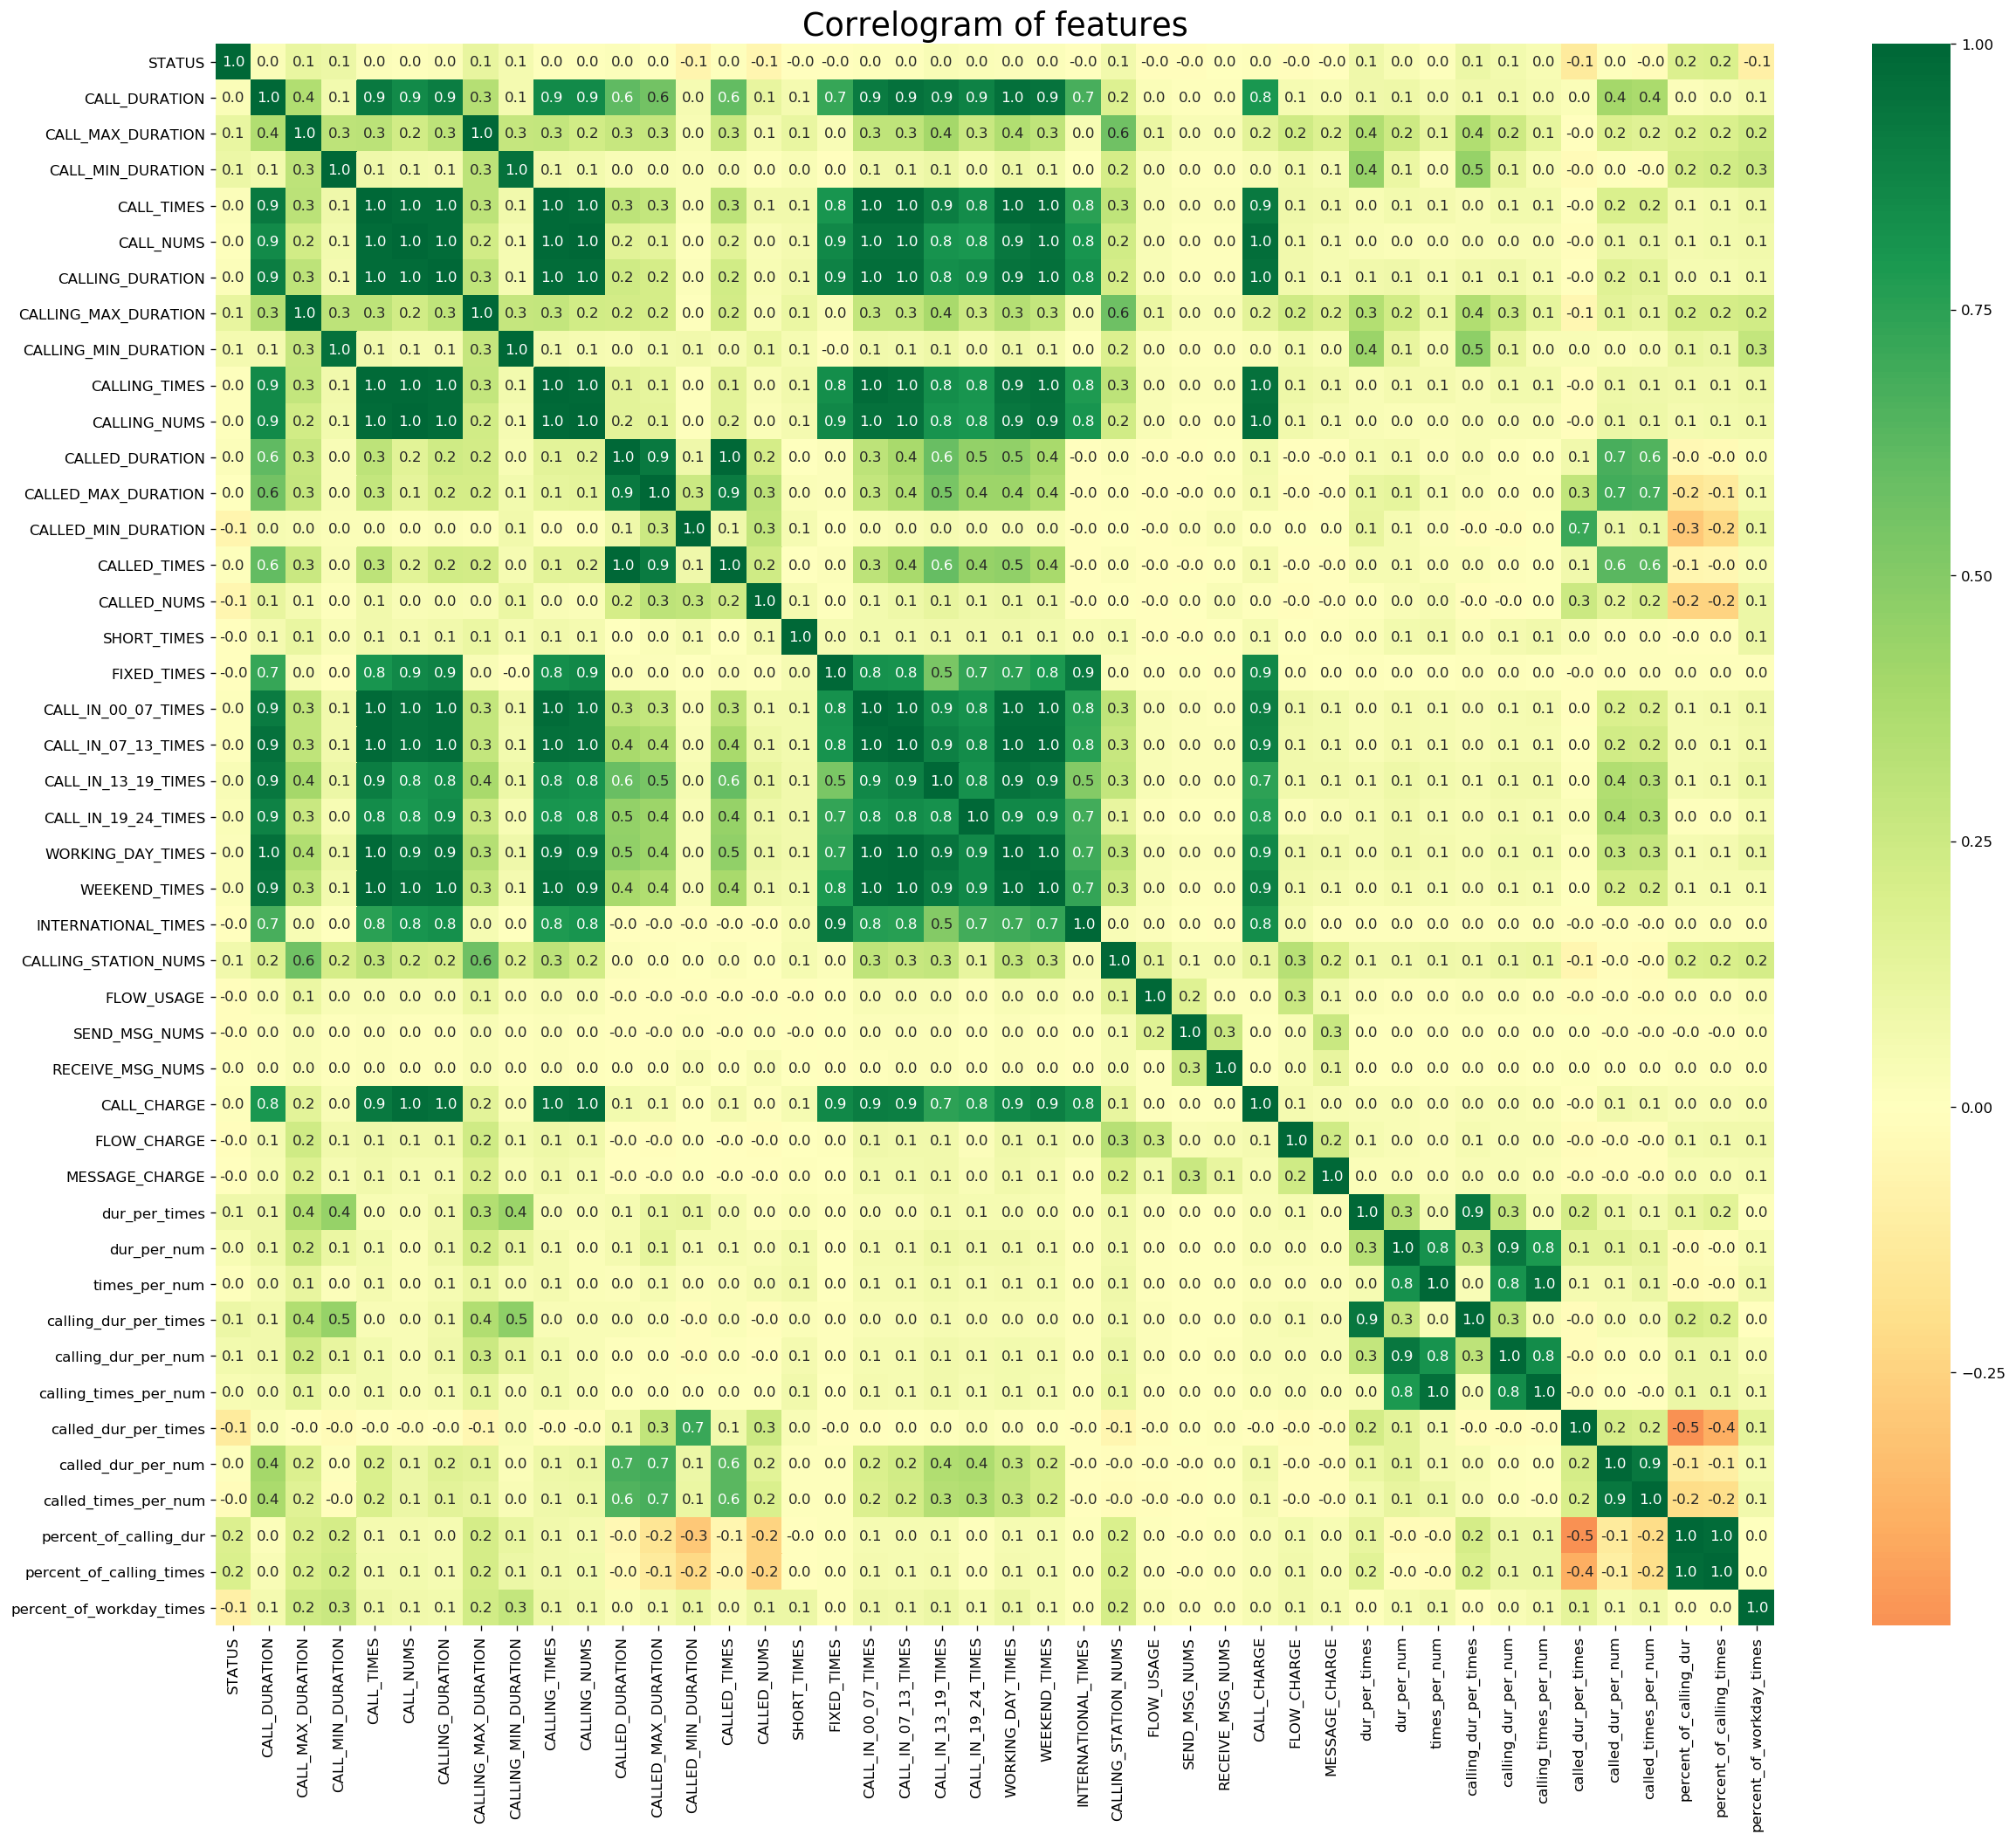

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,20), dpi= 120)
sns.heatmap(modeldata.corr(), xticklabels=modeldata.corr().columns, yticklabels=modeldata.corr().columns, cmap='RdYlGn',fmt='.1f',center=0, annot=True)
plt.title('Correlogram of features', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
modeldata[["CALL_DURATION","CALLING_DURATION","CALLED_DURATION","dur_per_num"]][modeldata["CALLED_DURATION"]>0].head()

,CALL_DURATION,CALLING_DURATION,CALLED_DURATION,dur_per_num
8,14243.0,14213.0,30.0,171.6024096385542
35,3023.0,143.0,2880.0,1511.5
36,4942.0,3360.0,1582.0,235.33333333333334
37,255.0,50.0,205.0,127.5
39,17458.0,15103.0,2355.0,235.9189189189189


In [13]:
featureCols=["CALL_DURATION","CALL_MAX_DURATION","CALL_MIN_DURATION","CALL_TIMES","CALL_NUMS","CALLING_DURATION","CALLING_MAX_DURATION",
           "CALLING_MIN_DURATION","CALLING_TIMES","CALLING_NUMS","CALLED_DURATION","CALLED_MAX_DURATION","CALLED_MIN_DURATION",
           "CALLED_TIMES","CALLED_NUMS","SHORT_TIMES","FIXED_TIMES","CALL_IN_00_07_TIMES",
           "CALL_IN_07_13_TIMES","CALL_IN_13_19_TIMES","CALL_IN_19_24_TIMES","WORKING_DAY_TIMES","WEEKEND_TIMES","INTERNATIONAL_TIMES",
           "CALLING_STATION_NUMS","FLOW_USAGE","SEND_MSG_NUMS","RECEIVE_MSG_NUMS","CALL_CHARGE","FLOW_CHARGE","MESSAGE_CHARGE",
            "dur_per_times","dur_per_num","times_per_num",
            "calling_dur_per_times","calling_dur_per_num","calling_times_per_num","called_dur_per_times","called_dur_per_num","called_times_per_num",
            "percent_of_calling_dur","percent_of_calling_times","percent_of_workday_times"]
len(featureCols)

43

In [14]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import f1_score
from xgboost import plot_importance
from matplotlib import pyplot

In [15]:
X=modeldata[featureCols]
y=modeldata["STATUS"]
train_x_all, test_x_all, train_y_all, test_y=train_test_split(X,y,random_state=88888)
train_data=lgb.Dataset(train_x_all,train_y_all,free_raw_data=False)

In [16]:
params = {
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'n_estimators':2000,
    'max_depth': 8,
    'num_leaves':30,
    'learning_rate': 0.04,
    'feature_fraction': 0.3,
    'feature_fraction_bynode':0.7,
    'top_rate':0.3,
    'other_rate':0.1,
    'lambda_l1':0,
    'lambda_l2':1,
    'num_threads':10
}

In [17]:
gbm=lgb.train(params,train_data,valid_sets={train_data},early_stopping_rounds=10)

D:\Users\fjc-pc\anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.589464
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.580263
[3]	training's binary_logloss: 0.571853
[4]	training's binary_logloss: 0.564448
[5]	training's binary_logloss: 0.558395
[6]	training's binary_logloss: 0.552051
[7]	training's binary_logloss: 0.546938
[8]	training's binary_logloss: 0.541339
[9]	training's binary_logloss: 0.536677
[10]	training's binary_logloss: 0.53178
[11]	training's binary_logloss: 0.527201
[12]	training's binary_logloss: 0.523189
[13]	training's binary_logloss: 0.518756
[14]	training's binary_logloss: 0.514688
[15]	training's binary_logloss: 0.511296
[16]	training's binary_logloss: 0.507114
[17]	training's binary_logloss: 0.503672
[18]	training's binary_logloss: 0.499887
[19]	training's binary_logloss: 0.49625
[20]	training's binary_logloss: 0.493107
[21]	training's binary_logloss: 0.489745
[22]	training's binary_logloss: 0.486742
[23]	training's binary_logloss: 0.484325
[24]	t

[230]	training's binary_logloss: 0.388785
[231]	training's binary_logloss: 0.38864
[232]	training's binary_logloss: 0.388506
[233]	training's binary_logloss: 0.38838
[234]	training's binary_logloss: 0.388276
[235]	training's binary_logloss: 0.388148
[236]	training's binary_logloss: 0.387975
[237]	training's binary_logloss: 0.387817
[238]	training's binary_logloss: 0.387697
[239]	training's binary_logloss: 0.387611
[240]	training's binary_logloss: 0.387481
[241]	training's binary_logloss: 0.387384
[242]	training's binary_logloss: 0.387252
[243]	training's binary_logloss: 0.387115
[244]	training's binary_logloss: 0.386966
[245]	training's binary_logloss: 0.386846
[246]	training's binary_logloss: 0.386717
[247]	training's binary_logloss: 0.386619
[248]	training's binary_logloss: 0.386497
[249]	training's binary_logloss: 0.386344
[250]	training's binary_logloss: 0.38621
[251]	training's binary_logloss: 0.386085
[252]	training's binary_logloss: 0.385972
[253]	training's binary_logloss: 0.38

[438]	training's binary_logloss: 0.366672
[439]	training's binary_logloss: 0.36658
[440]	training's binary_logloss: 0.36652
[441]	training's binary_logloss: 0.36644
[442]	training's binary_logloss: 0.366362
[443]	training's binary_logloss: 0.36626
[444]	training's binary_logloss: 0.36617
[445]	training's binary_logloss: 0.366058
[446]	training's binary_logloss: 0.365934
[447]	training's binary_logloss: 0.365825
[448]	training's binary_logloss: 0.365742
[449]	training's binary_logloss: 0.365672
[450]	training's binary_logloss: 0.365587
[451]	training's binary_logloss: 0.365479
[452]	training's binary_logloss: 0.365376
[453]	training's binary_logloss: 0.365286
[454]	training's binary_logloss: 0.365194
[455]	training's binary_logloss: 0.365101
[456]	training's binary_logloss: 0.365
[457]	training's binary_logloss: 0.364904
[458]	training's binary_logloss: 0.364798
[459]	training's binary_logloss: 0.364712
[460]	training's binary_logloss: 0.364606
[461]	training's binary_logloss: 0.364521


[666]	training's binary_logloss: 0.347455
[667]	training's binary_logloss: 0.347369
[668]	training's binary_logloss: 0.347301
[669]	training's binary_logloss: 0.34724
[670]	training's binary_logloss: 0.347155
[671]	training's binary_logloss: 0.347094
[672]	training's binary_logloss: 0.347027
[673]	training's binary_logloss: 0.346942
[674]	training's binary_logloss: 0.346872
[675]	training's binary_logloss: 0.346794
[676]	training's binary_logloss: 0.346725
[677]	training's binary_logloss: 0.346632
[678]	training's binary_logloss: 0.346543
[679]	training's binary_logloss: 0.346485
[680]	training's binary_logloss: 0.346431
[681]	training's binary_logloss: 0.346356
[682]	training's binary_logloss: 0.346302
[683]	training's binary_logloss: 0.34623
[684]	training's binary_logloss: 0.346136
[685]	training's binary_logloss: 0.346096
[686]	training's binary_logloss: 0.346024
[687]	training's binary_logloss: 0.345942
[688]	training's binary_logloss: 0.345874
[689]	training's binary_logloss: 0.3

[872]	training's binary_logloss: 0.333342
[873]	training's binary_logloss: 0.333253
[874]	training's binary_logloss: 0.333195
[875]	training's binary_logloss: 0.333125
[876]	training's binary_logloss: 0.333089
[877]	training's binary_logloss: 0.333
[878]	training's binary_logloss: 0.332956
[879]	training's binary_logloss: 0.332891
[880]	training's binary_logloss: 0.332818
[881]	training's binary_logloss: 0.332707
[882]	training's binary_logloss: 0.332649
[883]	training's binary_logloss: 0.332568
[884]	training's binary_logloss: 0.332534
[885]	training's binary_logloss: 0.332476
[886]	training's binary_logloss: 0.332391
[887]	training's binary_logloss: 0.332361
[888]	training's binary_logloss: 0.332304
[889]	training's binary_logloss: 0.33225
[890]	training's binary_logloss: 0.332169
[891]	training's binary_logloss: 0.332121
[892]	training's binary_logloss: 0.33203
[893]	training's binary_logloss: 0.331947
[894]	training's binary_logloss: 0.33189
[895]	training's binary_logloss: 0.33184

[1069]	training's binary_logloss: 0.321658
[1070]	training's binary_logloss: 0.321617
[1071]	training's binary_logloss: 0.321563
[1072]	training's binary_logloss: 0.321515
[1073]	training's binary_logloss: 0.321428
[1074]	training's binary_logloss: 0.321377
[1075]	training's binary_logloss: 0.321341
[1076]	training's binary_logloss: 0.321305
[1077]	training's binary_logloss: 0.321243
[1078]	training's binary_logloss: 0.321178
[1079]	training's binary_logloss: 0.321083
[1080]	training's binary_logloss: 0.321055
[1081]	training's binary_logloss: 0.321006
[1082]	training's binary_logloss: 0.320915
[1083]	training's binary_logloss: 0.320876
[1084]	training's binary_logloss: 0.320802
[1085]	training's binary_logloss: 0.320747
[1086]	training's binary_logloss: 0.320718
[1087]	training's binary_logloss: 0.320683
[1088]	training's binary_logloss: 0.320622
[1089]	training's binary_logloss: 0.320565
[1090]	training's binary_logloss: 0.320499
[1091]	training's binary_logloss: 0.320429
[1092]	trai

[1273]	training's binary_logloss: 0.310784
[1274]	training's binary_logloss: 0.310753
[1275]	training's binary_logloss: 0.310712
[1276]	training's binary_logloss: 0.310651
[1277]	training's binary_logloss: 0.310593
[1278]	training's binary_logloss: 0.310549
[1279]	training's binary_logloss: 0.310514
[1280]	training's binary_logloss: 0.310468
[1281]	training's binary_logloss: 0.310417
[1282]	training's binary_logloss: 0.310365
[1283]	training's binary_logloss: 0.310307
[1284]	training's binary_logloss: 0.310257
[1285]	training's binary_logloss: 0.310168
[1286]	training's binary_logloss: 0.310142
[1287]	training's binary_logloss: 0.310091
[1288]	training's binary_logloss: 0.310063
[1289]	training's binary_logloss: 0.310019
[1290]	training's binary_logloss: 0.30996
[1291]	training's binary_logloss: 0.309918
[1292]	training's binary_logloss: 0.309871
[1293]	training's binary_logloss: 0.309819
[1294]	training's binary_logloss: 0.309767
[1295]	training's binary_logloss: 0.309705
[1296]	train

[1483]	training's binary_logloss: 0.300609
[1484]	training's binary_logloss: 0.30057
[1485]	training's binary_logloss: 0.300531
[1486]	training's binary_logloss: 0.300493
[1487]	training's binary_logloss: 0.300457
[1488]	training's binary_logloss: 0.300414
[1489]	training's binary_logloss: 0.300367
[1490]	training's binary_logloss: 0.300323
[1491]	training's binary_logloss: 0.300277
[1492]	training's binary_logloss: 0.300219
[1493]	training's binary_logloss: 0.30017
[1494]	training's binary_logloss: 0.300096
[1495]	training's binary_logloss: 0.300051
[1496]	training's binary_logloss: 0.300006
[1497]	training's binary_logloss: 0.299958
[1498]	training's binary_logloss: 0.299929
[1499]	training's binary_logloss: 0.299871
[1500]	training's binary_logloss: 0.29982
[1501]	training's binary_logloss: 0.299799
[1502]	training's binary_logloss: 0.299735
[1503]	training's binary_logloss: 0.299693
[1504]	training's binary_logloss: 0.29963
[1505]	training's binary_logloss: 0.299602
[1506]	training

[1692]	training's binary_logloss: 0.291399
[1693]	training's binary_logloss: 0.291356
[1694]	training's binary_logloss: 0.291332
[1695]	training's binary_logloss: 0.291294
[1696]	training's binary_logloss: 0.291267
[1697]	training's binary_logloss: 0.291243
[1698]	training's binary_logloss: 0.291204
[1699]	training's binary_logloss: 0.291148
[1700]	training's binary_logloss: 0.291118
[1701]	training's binary_logloss: 0.291077
[1702]	training's binary_logloss: 0.29106
[1703]	training's binary_logloss: 0.291026
[1704]	training's binary_logloss: 0.291005
[1705]	training's binary_logloss: 0.290983
[1706]	training's binary_logloss: 0.290926
[1707]	training's binary_logloss: 0.290881
[1708]	training's binary_logloss: 0.290867
[1709]	training's binary_logloss: 0.290802
[1710]	training's binary_logloss: 0.290751
[1711]	training's binary_logloss: 0.290703
[1712]	training's binary_logloss: 0.290668
[1713]	training's binary_logloss: 0.29062
[1714]	training's binary_logloss: 0.29058
[1715]	trainin

[1901]	training's binary_logloss: 0.283174
[1902]	training's binary_logloss: 0.28314
[1903]	training's binary_logloss: 0.283085
[1904]	training's binary_logloss: 0.283048
[1905]	training's binary_logloss: 0.283012
[1906]	training's binary_logloss: 0.28297
[1907]	training's binary_logloss: 0.282916
[1908]	training's binary_logloss: 0.282886
[1909]	training's binary_logloss: 0.282866
[1910]	training's binary_logloss: 0.282835
[1911]	training's binary_logloss: 0.282792
[1912]	training's binary_logloss: 0.282752
[1913]	training's binary_logloss: 0.282716
[1914]	training's binary_logloss: 0.282672
[1915]	training's binary_logloss: 0.282642
[1916]	training's binary_logloss: 0.282597
[1917]	training's binary_logloss: 0.282539
[1918]	training's binary_logloss: 0.282498
[1919]	training's binary_logloss: 0.28246
[1920]	training's binary_logloss: 0.282421
[1921]	training's binary_logloss: 0.282357
[1922]	training's binary_logloss: 0.282307
[1923]	training's binary_logloss: 0.282279
[1924]	trainin

In [18]:
y_pred=gbm.predict(test_x_all)
pred_label=np.where(y_pred>0.5,1,0)
f1=f1_score(test_y,pred_label)
print(f1)

0.5385349884054017


In [19]:
pd.crosstab(test_y,pred_label)

col_0,0,1
STATUS,,
0.0,8981,1348
1.0,2035,1974


In [20]:
for x,y in sorted(zip(featureCols,gbm.feature_importance("gain")),key=lambda x:-x[1]):
    print(x,y)

CALL_CHARGE 59026.67498395592
CALLING_STATION_NUMS 38619.82913303375
CALLING_NUMS 33971.11958056688
FLOW_USAGE 32962.07143364847
CALLING_MAX_DURATION 29659.75622189045
FLOW_CHARGE 28669.853099137545
percent_of_workday_times 25424.887271776795
CALL_MAX_DURATION 24821.10485190153
SHORT_TIMES 24807.347857624292
CALL_IN_00_07_TIMES 23909.140473783016
calling_dur_per_times 23818.47034963593
CALLING_DURATION 22323.519631534815
CALL_DURATION 22243.713991045952
WORKING_DAY_TIMES 22243.682453244925
calling_dur_per_num 21803.49570313096
dur_per_times 21750.28496837616
CALL_IN_07_13_TIMES 21704.06513106823
CALL_TIMES 21556.184068076313
times_per_num 21540.811568573117
CALL_MIN_DURATION 21123.75214447081
WEEKEND_TIMES 20748.092735007405
CALL_IN_13_19_TIMES 20735.97850999981
CALL_NUMS 20293.145350813866
calling_times_per_num 19626.836261183023
dur_per_num 19470.24074089527
SEND_MSG_NUMS 19205.484911084175
CALLING_MIN_DURATION 18536.619441479445
CALLING_TIMES 17767.854366451502
MESSAGE_CHARGE 15638.

In [21]:
gbm.save_model('lgbm_model.txt')

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

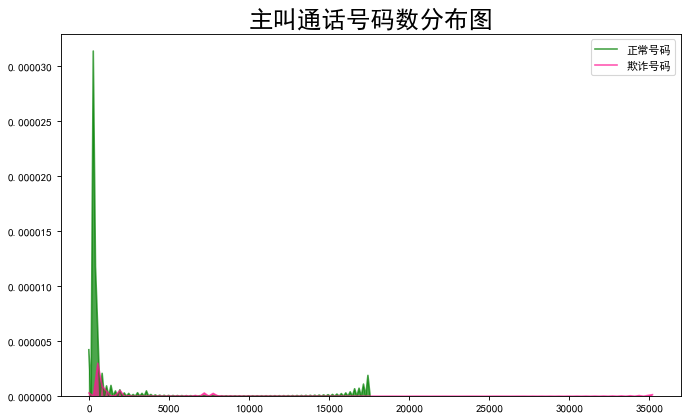

In [34]:
plt.figure(figsize=(10,6), dpi= 80)
sns.kdeplot(modeldata.loc[df['STATUS'] == 0, "CALLING_NUMS"], shade=True, color="g", label="正常号码", alpha=.7)
sns.kdeplot(modeldata.loc[df['STATUS'] == 1, "CALLING_NUMS"], shade=True, color="deeppink", label="欺诈号码", alpha=.7)
plt.title('主叫通话号码数分布图', fontsize=22)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()